# 数据爬取

数据字段：用户id，用户姓名，注册时间，地区，时间，评分，评论，点赞数，是否看过<br>
爬取数量：总评论数15万条，豆瓣网站只开放25页，所以数量只有500条<br>
存储格式：csv

豆瓣评论只开放25页，所以没办法爬取所有评论<br>
可以用猫眼去爬，app的url:http://m.maoyan.com/movie/248906/morecomments?_v_=yes<br>
隐藏api:http://m.maoyan.com/review/v2/comments.json?movieId=1277939&userId=-1&offset=0&limit=15&ts=0&level=2&type=3
把参数offset更改即可，15条累加

In [1]:
#导入模块
import requests
import csv
import re
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba    
import wordcloud

In [2]:
#plot在出图时候可以正常显示中文
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [80]:
#初始化数据
dit = {'用户ID':'',
       '用户名':'',
       '注册时间': '',
       '常驻地点': '',
       '评论': '',
       '评分':'',
       '评论时间':'',
       '点赞数': '',
       '是否看过': ''}
lit = []
headers = {'Referer':'https://movie.douban.com/subject/32659890/',
          'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36',
           'Cookie':''}  #cookie可以自行登录后添加
left_url = 'https://movie.douban.com/subject/32659890/comments?start='
right_url = '&limit=20&sort=new_score&status=P'
start = 0
with open(r'C:\Users\Administrator\Desktop\我和我的祖国豆瓣评论数据.csv','a',newline='',encoding='utf-8-sig') as files:
    writer = csv.DictWriter(files,fieldnames=dit.keys())
    writer.writeheader()

In [81]:
def get_page(url):
    response = requests.get(url,headers=headers)
    return BeautifulSoup(response.text,'lxml')

In [82]:
for page in range(26):      #遍历评论页数，只有25页数据开放，多一条都没
    url = left_url+str(start)+right_url            #拼接url
    headers['Referer'] = 'https://movie.douban.com/subject/32659890/'
    soup = get_page(url)            #获取网页
    print('已登陆第%s页评论'%(page+1))
    time.sleep(3)
    find_comment_by_page = soup.find_all(class_="comment-item")    #找到每一条评论，存列表
    for num in range(len(find_comment_by_page)):
        find_comment = find_comment_by_page[num].find(class_="comment")     #遍历一条评论 
        find_comment_info = find_comment.h3.find(class_="comment-info").find_all('span') 
        if len(find_comment_info) == 3:
            dit['评论时间'] = find_comment_info[-1].get('title')    #获取评论时间
            find_result = find_comment_info[-2].get('class')   #提取分数
            dit['评分'] = re.findall(r'[0-9]+',find_result[0])[0]    #用正则表达式提取数字
            dit['是否看过'] = find_comment_info[-3].text    #获取是否看过
            dit['评论'] = find_comment.p.text.split()[0]    #获取评论内容
            dit['用户名'] = find_comment.h3.find(class_="comment-info").a.text   #获取用户名
            dit['点赞数'] = find_comment.h3.find(class_="comment-vote").span.text   #获取点赞数
            user_url = find_comment.h3.find(class_="comment-info").a.get('href')  #获取用户个人主页链接，以便抓取个人信息
            headers['Referer'] = url           #更改源链接，模拟从评论页跳转到个人页  
            user_soup = get_page(user_url)     #爬取个人页面
            print('已登陆第%s页的第%s条评论'%(page+1,num+1))
            time.sleep(2)
            find_user_data = user_soup.find(class_="user-info")
            find_user_id_time = find_user_data.div.text.split()     #精确id和time，返回列表
            dit['用户ID'] = find_user_id_time[0]     #获取id
            dit['注册时间'] = re.findall(r'[^\u4e00-\u9fa5]+',find_user_id_time[1])[0]  #获取注册时间,去掉中文加入
            try:         #用户地点可能会为空，所以用try
                dit['常驻地点'] = find_user_data.a.text   #获取用户地点
            except:
                dit['常驻地点'] = '无'
            lit.append(dit.copy())
    start = start + 20
    with open(r'C:\Users\Administrator\Desktop\我和我的祖国豆瓣评论数据.csv','a',newline='',encoding='utf-8-sig') as files:
        writer = csv.DictWriter(files,fieldnames=dit.keys())
        writer.writerows(lit)
    lit = []     #按一页一页为标准存储数据后清空内存

已登陆第1页评论
已登陆第1页的第1条评论
已登陆第1页的第2条评论
已登陆第1页的第3条评论
已登陆第1页的第4条评论
已登陆第1页的第5条评论
已登陆第1页的第6条评论
已登陆第1页的第7条评论
已登陆第1页的第8条评论
已登陆第1页的第9条评论
已登陆第1页的第10条评论
已登陆第1页的第11条评论
已登陆第1页的第12条评论
已登陆第1页的第13条评论
已登陆第1页的第14条评论
已登陆第1页的第15条评论
已登陆第1页的第16条评论
已登陆第1页的第17条评论
已登陆第1页的第18条评论
已登陆第1页的第19条评论
已登陆第1页的第20条评论
已登陆第2页评论
已登陆第2页的第1条评论
已登陆第2页的第2条评论
已登陆第2页的第3条评论
已登陆第2页的第4条评论
已登陆第2页的第5条评论
已登陆第2页的第6条评论
已登陆第2页的第7条评论
已登陆第2页的第8条评论
已登陆第2页的第9条评论
已登陆第2页的第10条评论
已登陆第2页的第11条评论
已登陆第2页的第12条评论
已登陆第2页的第13条评论
已登陆第2页的第14条评论
已登陆第2页的第15条评论
已登陆第2页的第16条评论
已登陆第2页的第17条评论
已登陆第2页的第18条评论
已登陆第2页的第19条评论
已登陆第2页的第20条评论
已登陆第3页评论
已登陆第3页的第1条评论
已登陆第3页的第2条评论
已登陆第3页的第3条评论
已登陆第3页的第4条评论
已登陆第3页的第5条评论
已登陆第3页的第6条评论
已登陆第3页的第8条评论
已登陆第3页的第9条评论
已登陆第3页的第10条评论
已登陆第3页的第11条评论
已登陆第3页的第12条评论
已登陆第3页的第13条评论
已登陆第3页的第14条评论
已登陆第3页的第15条评论
已登陆第3页的第17条评论
已登陆第3页的第18条评论
已登陆第3页的第19条评论
已登陆第3页的第20条评论
已登陆第4页评论
已登陆第4页的第1条评论
已登陆第4页的第2条评论
已登陆第4页的第3条评论
已登陆第4页的第4条评论
已登陆第4页的第5条评论
已登陆第4页的第6条评论
已登陆第4页的第7条评论
已登陆第4页的第9条评论
已登陆第4页的第10条评论
已登陆第4页的第12条评论
已登陆第4页的第13条评论
已登陆第4页的第14条评论
已登陆第4页的第15条评论
已登陆第

AttributeError: 'NoneType' object has no attribute 'h3'

# 进行数据清洗和分析

要分析的问题：<br>
1、总体评分情况（指标：分数+数量）<br>
2、高分原因并分析哪一段好（词云图）<br>
3、低分原因并分析哪一段差（词云图）<br>
4、判断是否存在水军刷分：<br>
   a.从总体用户注册时间分布分析以及高分和低分用户注册时间分布分析，高分和低分用户注册时间分布是否与总体趋势大体一致（指标：注册时间+数量，刻度一年）<br>
   b.高分评论及低分评论的评论时间分布分析（指标：评论时间+数量）<br>
   c.同一用户出现多次评论且评分范围一致现象分析

In [3]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\我和我的祖国豆瓣评论数据.csv')

In [4]:
df.shape

(480, 9)

In [14]:
df = df.dropna(subset=['常驻地点'])  #对特定列的数据进行删除空值
print(df.describe())
df.head(5)

               评分          点赞数
count  479.000000   479.000000
mean    40.083507   236.538622
std      8.629600   870.188931
min     10.000000     0.000000
25%     30.000000    14.000000
50%     40.000000    27.000000
75%     50.000000    80.500000
max     50.000000  8380.000000


,用户ID,用户名,注册时间,常驻地点,评论,评分,评论时间,点赞数,是否看过
0,88652488,文刀大土申,2014-05-10,广东广州,竟然超出预期，竟然陈凯歌最差,40,2019-09-29 08:49:02,7609,看过
1,172745195,Not dry,2018-01-18,湖北武汉,第三段那个小男孩太棒了,50,2019-09-30 15:00:35,8380,看过
2,ma-sheng,麻绳,2008-03-26,北京,徐峥胜出。陈凯歌是作为总导演自告奋勇地拿了最烂的那个本子吗？,30,2019-09-28 22:02:10,7234,看过
3,2049622,LOOK,2007-11-30,上海,三星都给徐峥这段。基本就是卡萨布兰卡+繁花，唯一缺陷是冬冬长大后怎么就变成了吴京而不是胡歌。...,30,2019-09-29 13:57:44,3043,看过
4,lingrui1995,凌睿,2012-08-07,重庆,《北京你好》最佳。宁浩竟然能把北京奥运会如此盛大的赛事拍得那么接地气，而且笑中带泪。,40,2019-09-29 23:22:00,7422,看过


1、总体评分情况（指标：分数+数量）

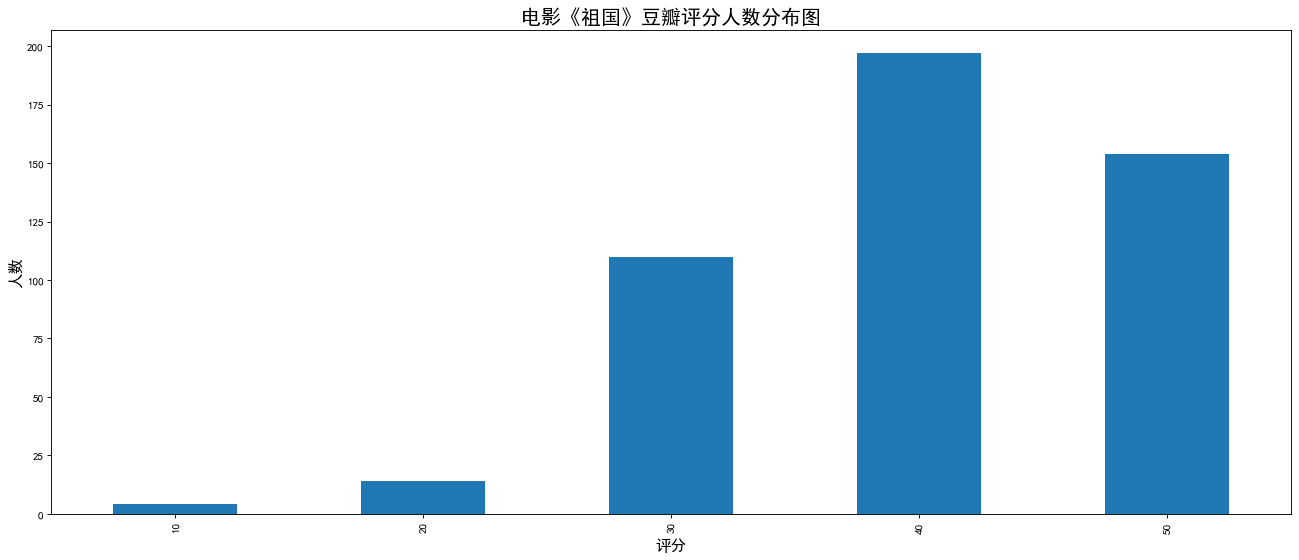

In [13]:
df_groupby_score = df.groupby('评分')
plt.figure(figsize=(20,8),dpi=80)
df_groupby_score['用户ID'].count().plot(kind='bar')
plt.xlabel('评分',fontsize=14)
plt.ylabel('人数',fontsize=14)
plt.title('电影《祖国》豆瓣评分人数分布图',fontsize=18)
plt.show()

结论：1.总体平均分为高分4分；2.绝大部分用户评出了高分（4~5分）；

2、高分原因并分析哪一段好（词云图）

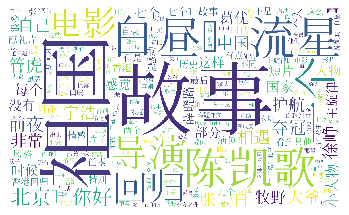

In [16]:
stopwords = ['可以','好看','就是','我们','真的','比较','不错','还是','觉得','因为','喜欢','这个','那个']    #要过滤的词
hight_score = df[df['评分']>30]
hight_score_word = ' '.join(hight_score['评论'])
hight_fenci = jieba.cut(hight_score_word,cut_all=False)
hight_space = ' '.join(hight_fenci)
hight_wc = wordcloud.WordCloud(r'C:\Users\Administrator\Desktop\日本花园明朝体HanaMin.ttf',background_color="white",width=1500,height=900,min_font_size=10,stopwords=stopwords)
hight_wc.generate(hight_space)
plt.imshow(hight_wc)
plt.axis('off')
hight_wc.to_file(r'C:\Users\Administrator\Desktop\我和我的祖国高分评价图.png')
plt.show()

结论：给高评分的观众理由是：题材关于国家、爱国，以及故事比较的吸引，观众看完后有感动、自豪、激动的情绪

In [17]:
#分析具体哪一片段评分较好
hight_movies = {'前夜':0,'相遇':0,'夺冠':0,'回归':0,'北京你好':0,'白昼流星':0,'护航':0}
for hight_comment in hight_score['评论']:
    for k,v in hight_movies.items():
        if k in hight_comment:
            hight_movies[k] = hight_movies[k] + 1
hight_movies

{'前夜': 52, '相遇': 37, '夺冠': 60, '回归': 64, '北京你好': 51, '白昼流星': 60, '护航': 40}

结论：可以看到在给出高分的观众比较喜欢的是回归、夺冠和白昼流星

3、低分原因并分析哪一段差（词云图）

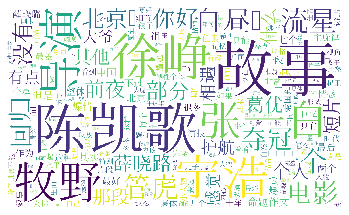

In [19]:
low_score = df[df['评分']<= 30]
low_score_word = ' '.join(low_score['评论'])
low_fenci = jieba.cut(low_score_word,cut_all=False)
low_space = ' '.join(low_fenci)
low_wc = wordcloud.WordCloud(r'C:\Users\Administrator\Desktop\日本花园明朝体HanaMin.ttf',background_color="white",width=1500,height=900,min_font_size=10,stopwords=stopwords)
low_wc.generate(low_space)
plt.imshow(low_wc)
plt.axis('off')
low_wc.to_file(r'C:\Users\Administrator\Desktop\我和我的祖国低分评价图.png')
plt.show()

结论：给低分的观众的理由是：煽情、尴尬<br>
从高分和低分词云图可看出陈凯歌的讨论话题度是非常高的，他所导演的《白昼流星》片段讨论热度最高，争议较大，但相反正因争议大才能吸引观众眼球

4、判断是否存在水军刷分：<br>
a.从总体用户注册时间分布分析以及高分和低分用户注册时间分布分析（指标：注册时间+数量，刻度一年）<br>
b.高分评论及低分评论的评论时间分布分析（指标：评论时间+数量）<br>
c.同一用户出现多次评论且评分范围一致现象分析<br>

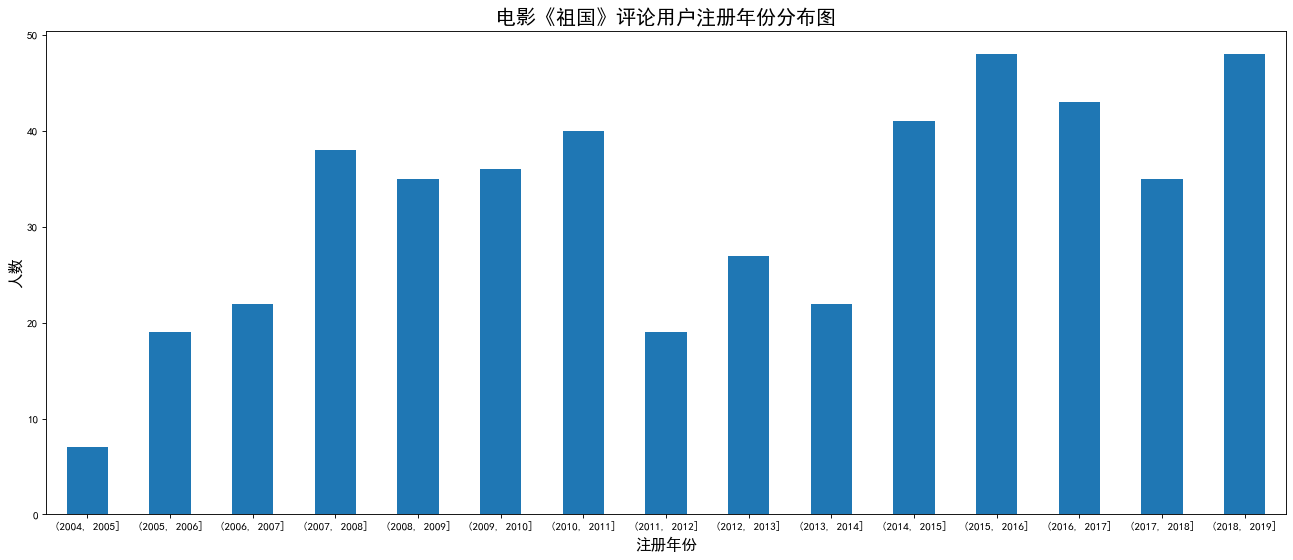

In [17]:
#a.从总体用户注册时间分布分析以及高分和低分用户注册时间分布分析
df_date = df[['用户ID','注册时间','评分']].copy()
df_date['注册时间'] = pd.to_datetime(df_date['注册时间']).values.copy()
df_date['注册年份'] = df_date['注册时间'].dt.year.copy()
group_num = range(min(df_date['注册年份'])-1,max(df_date['注册年份'])+1)
bins = pd.cut(df_date['注册年份'],group_num)
plt.figure(figsize=(20,8),dpi=80)
plt.xlabel('注册年份',fontsize=14)
plt.ylabel('人数',fontsize=14)
plt.title('电影《祖国》评论用户注册年份分布图',fontsize=18)
bins.value_counts().sort_index().plot(kind='bar',rot=0)
plt.show()

结论：只有极少部分的用户注册时间在1年内，所以不存在大量水军注册用户刷分的情况<br>
因为数据量较少，且从上图可判断不存在水军刷分，所以暂不对低分注册时间和高分注册时间展开分析

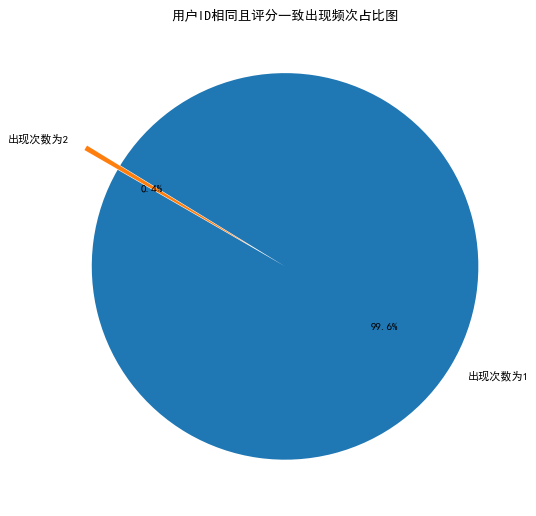

In [38]:
#c.同一用户出现多次评论且评分范围一致现象分析
df_contain = df[['用户ID','评分']].copy()
df_contain['用户ID&评分'] = df_contain['用户ID'].copy() + df_contain['评分'].map(str).copy()   #需要把int转换为str类型
df_contain_count = df_contain.groupby('用户ID&评分').count().copy()
pie = df_contain_count.groupby('用户ID').count()
plt.figure(figsize=(20,8),dpi=80)
plt.title('用户ID相同且评分一致出现频次占比图')
plt.pie(pie['评分'],labels=['出现次数为{}'.format(i) for i in pie.index.tolist()],explode=[0,0.2],autopct='%1.1f%%',startangle=150)
plt.show()

结论：上图可看到同一用户评论超过一次且每次评分一致的人数占比不超过1%，所以较少概率存在大量水军刷分，评分数据可靠性较高